In [9]:
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd  # Adjusted to use 'pd' for pandas

np.random.seed(10)
print (tf.__version__)

2.17.0


In [64]:
data = pd.read_csv('colors.csv')

In [12]:
names = data["name"]

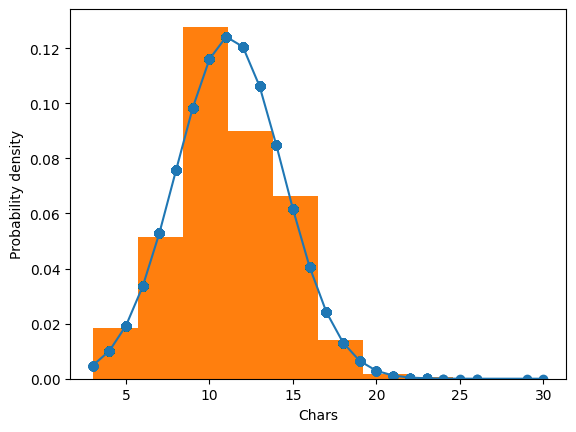

In [13]:
h = sorted(names.str.len().to_numpy())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [14]:
np.array(h).max()

30

## Tokenize for character level language model

In [15]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

## One-hot encoding

In [16]:
from tensorflow.keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [17]:
one_hot_names.shape

(14157, 25, 28)

In [18]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [19]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [20]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.build(input_shape=(None, maxlen, num_classes))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.save('model_1.h5')
model.summary()

c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 256)        │       291,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.load_weights('model_1.h5')

In [22]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - acc: 0.5902 - loss: 0.0623 - val_acc: 0.6638 - val_loss: 0.0594
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - acc: 0.6604 - loss: 0.0556 - val_acc: 0.6525 - val_loss: 0.0570
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - acc: 0.6615 - loss: 0.0529 - val_acc: 0.6766 - val_loss: 0.0539
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - acc: 0.6645 - loss: 0.0508 - val_acc: 0.6667 - val_loss: 0.0526
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - acc: 0.6733 - loss: 0.0472 - val_acc: 0.6794 - val_loss: 0.0497
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.6720 - loss: 0.0452 - val_acc: 0.6624 - val_loss: 0.0489
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.6799 - loss: 0.0439 - val_acc: 0.6773 - val_loss: 0.0476
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.6860 - loss: 0.0409 - val_acc: 0.6737 - val_loss: 0.0477
Epoch 9/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - acc: 0.8027 - loss: 0.0113
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - acc: 0.8035 - loss: 0.0091
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.8236 - loss: 0.0071
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - acc: 0.8288 - loss: 0.0064
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.8266 - loss: 0.0060
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - acc: 0.8399 - loss: 0.0058
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - acc: 0.8461 - loss: 0.0060
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.8465 - loss: 0.0055
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - acc: 0.8374 - loss: 0.0055
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.8459 - loss: 0.0055


In [24]:
# Save the model parameters for later use.
model.save_weights('model_1.weights.h5')

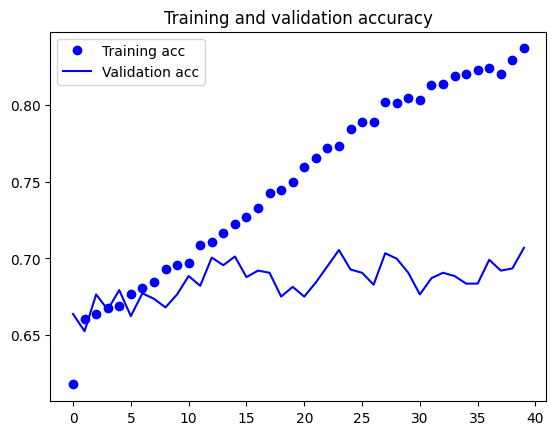

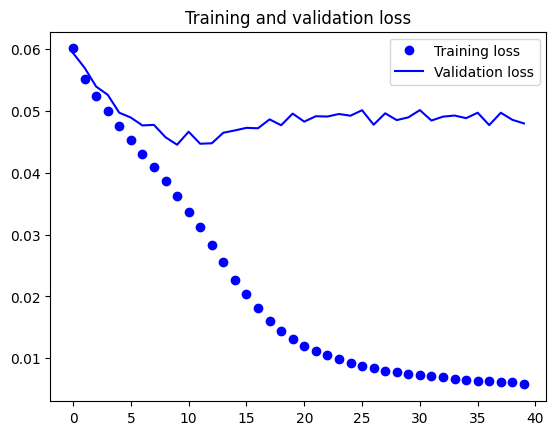

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [26]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [27]:
def scale(n):
    return int(n * 255) 

In [28]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=num_classes)  # Use to_categorical from keras.utils
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(f"{name}, R,G,B: {r}, {g}, {b}")
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
light blue, R,G,B: 191, 222, 244


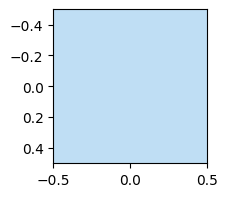

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
blue, R,G,B: 9, 55, 205


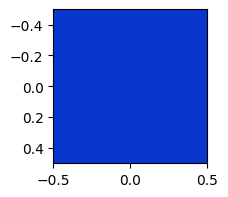

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
dark blue, R,G,B: 5, 13, 96


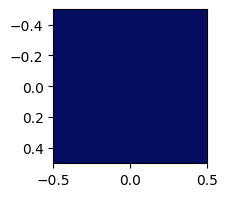

In [29]:

predict("light blue")
predict("blue")
predict("dark blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
black, R,G,B: 23, 22, 23


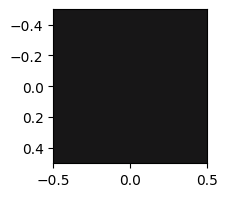

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
white, R,G,B: 243, 236, 228


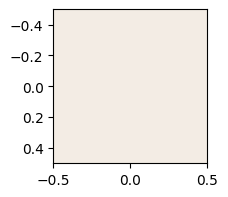

In [30]:
predict("black")
predict("white")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
apple red, R,G,B: 183, 65, 69


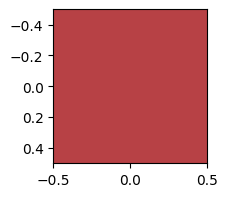

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
banana, R,G,B: 246, 241, 139


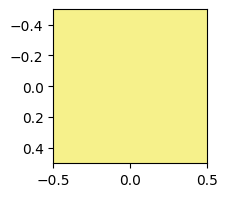

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
lime green, R,G,B: 109, 220, 15


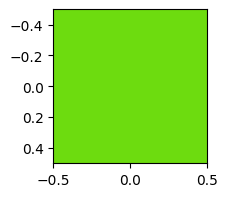

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
tangerine, R,G,B: 246, 109, 14


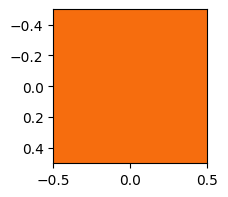

In [57]:
predict("apple red")
predict("banana")
predict("lime green")
predict("tangerine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
princess ivory, R,G,B: 242, 234, 222


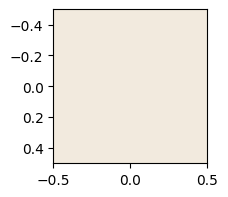

In [32]:
predict("princess ivory")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
summer softy, R,G,B: 244, 223, 207


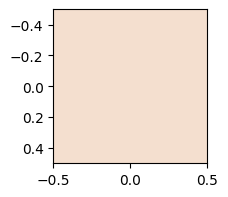

In [59]:
predict("summer softy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
keras red, R,G,B: 135, 41, 31


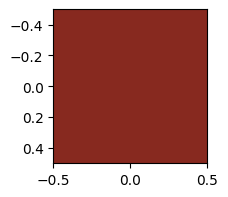

In [34]:
predict("keras red")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
sad blue, R,G,B: 136, 164, 190


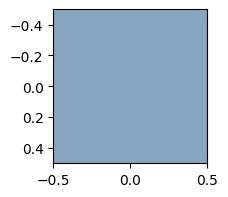

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
princess pink, R,G,B: 244, 221, 228


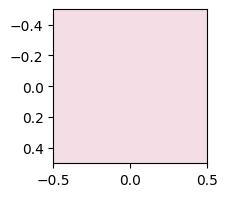

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
marigold, R,G,B: 229, 165, 17


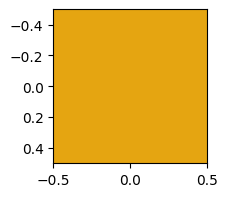

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
gold, R,G,B: 189, 150, 24


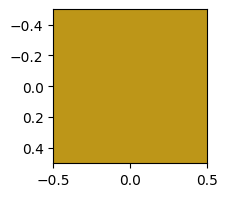

In [60]:
predict("sad blue")
predict("princess pink")
predict("marigold")
predict("gold")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
haripriya, R,G,B: 156, 178, 184


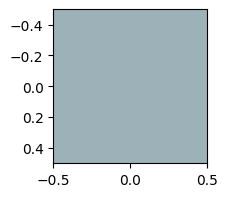

In [63]:
predict("haripriya")